# 10X scRNA-seq data Xenopus Laevis - Compute UMAPs per experiment

We will project the RNA velocities on them

# Data integration using Seurat

Read the count matrices, normalize and find 2000 HVGs for each sample

Read list of markers

In [1]:
#Function for gene ID - gene name conversion
convertGeneList <- function(x){
    #Read the list for the conversion
    conv.list<-read.csv('/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/Conversion_ID_names/conversion_geneID_genename_Xenopus_Laevis.csv')
    #Find the indices of my list in the conversion list
    indices<- which(conv.list[,'gene_id'] %in% x) 
    #Return the gene names and make them unique
    make.unique(as.character(conv.list[,'gene_name'][indices]))
}

Load the data, add metadata, normalize, find HVGs

In [2]:
library(Seurat)
library(ggplot2)
library(cowplot)

SIGAH12.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAH12_91_Chm3_FC2.csv"),
                         row.names = 1,header=TRUE,sep=",")
rownames(SIGAH12.data) <- convertGeneList(rownames(SIGAH12.data))
print(head(rownames(SIGAH12.data)))
#SIGAH12.data <- Read10X(data.dir = "/Users/christopherpenfold/Desktop/10X/Eva_10X/SIGAH12_91_Chm3_FC2/outs/filtered_feature_bc_matrix")
SIGAH12 <- CreateSeuratObject(counts = SIGAH12.data, project = "SIGAH12")
SIGAH12$stim <- "SIGAH12"
SIGAH12$isnt <- "NT"
#print(head(x = rownames(x = SIGAH12)))
#print(head(x = colnames(x = SIGAH12)))
#print(SIGAH12)
SIGAH12 <- subset(SIGAH12, subset = nFeature_RNA > 0)
SIGAH12 <- NormalizeData(SIGAH12, verbose = FALSE)
SIGAH12 <- FindVariableFeatures(SIGAH12, selection.method = "vst", nfeatures = 2000)

SIGAH5.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAH5_91_Chm3_FC2.csv"),
                        row.names = 1,header=TRUE,sep=",")
rownames(SIGAH5.data) <- convertGeneList(rownames(SIGAH5.data))
#SIGAH5.data <- Read10X(data.dir = "/Users/christopherpenfold/Desktop/10X/Eva_10X/SIGAH5_91_Chm3_FC2/outs/filtered_feature_bc_matrix")
SIGAH5 <- CreateSeuratObject(counts = SIGAH5.data, project = "SIGAH5")
SIGAH5$stim <- "SIGAH5"
SIGAH5$isnt <- "IVF"
SIGAH5 <- subset(SIGAH5, subset = nFeature_RNA > 0)
SIGAH5 <- NormalizeData(SIGAH5, verbose = FALSE)
SIGAH5 <- FindVariableFeatures(SIGAH5, selection.method = "vst", nfeatures = 2000)

SIGAA2.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAA2_91_Chm3_FC2r.csv"),
                        row.names = 1,header=TRUE,sep=",")
rownames(SIGAA2.data) <- convertGeneList(rownames(SIGAA2.data))
#SIGAA2.data <- Read10X(data.dir = "/Users/christopherpenfold/Desktop/Eva/10X/SIGAA2_91_Chm3_FC2r/outs/filtered_feature_bc_matrix")
SIGAA2 <- CreateSeuratObject(counts = SIGAA2.data, project = "SIGAA2")
SIGAA2$stim <- "SIGAA2"
SIGAA2$isnt <- "IVF"
SIGAA2 <- subset(SIGAA2, subset = nFeature_RNA > 0)
SIGAA2 <- NormalizeData(SIGAA2, verbose = FALSE)
SIGAA2 <- FindVariableFeatures(SIGAA2, selection.method = "vst", nfeatures = 2000)


SIGAB2.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAB2_91_Chm3_FC2r.csv"),
                        row.names = 1,header=TRUE,sep=",")
rownames(SIGAB2.data) <- convertGeneList(rownames(SIGAB2.data))
#SIGAB2.data <- Read10X(data.dir = "/Users/christopherpenfold/Desktop/Eva/10X/SIGAB2_91_Chm3_FC2r/outs/filtered_feature_bc_matrix")
SIGAB2 <- CreateSeuratObject(counts = SIGAB2.data, project = "SIGAB2")
SIGAB2$stim <- "SIGAB2"
SIGAB2$isnt <- "NT"
SIGAB2 <- subset(SIGAB2, subset = nFeature_RNA > 0)
SIGAB2 <- NormalizeData(SIGAB2, verbose = FALSE)
SIGAB2 <- FindVariableFeatures(SIGAB2, selection.method = "vst", nfeatures = 2000)


Markers <- read.delim("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/Gene_lists/Markers.txt")
markerlist <- c(paste(Markers$Marker_genes,".L",sep = "")
                ,paste(Markers$Marker_genes,".S",sep = ""))

[1] "Xelaev18000001m.g" "Xelaev18000003m.g" "Xelaev18000004m.g"
[4] "Xelaev18000005m.g" "tm6sf2.1"          "Xelaev18000007m.g"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Perform batch integration for the two experiments separately

In [3]:
xenopus.anchors.exp1 <- FindIntegrationAnchors(object.list = list(SIGAA2, SIGAB2),
                                          dims = 1:20, anchor.features = 2000)
xenopus.combined.exp1 <- IntegrateData(anchorset = xenopus.anchors.exp1, dims = 1:20)
DefaultAssay(xenopus.combined.exp1) <- "integrated"
xenopus.combined.exp1 <- ScaleData(xenopus.combined.exp1, verbose = FALSE)
xenopus.combined.exp1 <- RunPCA(xenopus.combined.exp1, npcs = 30, verbose = FALSE)
xenopus.combined.exp1 <- RunUMAP(xenopus.combined.exp1, reduction = "pca", dims = 1:20)

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1684 anchors

Filtering anchors

	Retained 1523 anchors

Extracting within-dataset neighbors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:02:09 UMAP embedding parameters a = 0.9922 b = 1.112

17:02:09 Read 1080 rows and found 20 numeric columns

17:02:09 Using Annoy for neighbor search, n_neighbors = 30

17:02:09 Building Annoy index with metric 

In [4]:
xenopus.anchors.exp2 <- FindIntegrationAnchors(object.list = list(SIGAH5, SIGAH12),
                                          dims = 1:20, anchor.features = 2000)
xenopus.combined.exp2 <- IntegrateData(anchorset = xenopus.anchors.exp2, dims = 1:20)
DefaultAssay(xenopus.combined.exp2) <- "integrated"
xenopus.combined.exp2 <- ScaleData(xenopus.combined.exp2, verbose = FALSE)
xenopus.combined.exp2 <- RunPCA(xenopus.combined.exp2, npcs = 30, verbose = FALSE)
xenopus.combined.exp2 <- RunUMAP(xenopus.combined.exp2, reduction = "pca", dims = 1:20)

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2930 anchors

Filtering anchors

	Retained 2221 anchors

Extracting within-dataset neighbors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”
17:02:26 UMAP embedding parameters a = 0.9922 b = 1.112

17:02:26 Read 2325 rows and found 20 numeric columns

17:02:26 Using Annoy for neighbor search, n_neighbors = 30

17:02:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:02:26 Writing NN index file to temp file /var/f

An object of class Seurat 
33179 features across 1054 samples within 2 assays 
Active assay: RNA (31179 features)
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, umap, tsne
An object of class Seurat 
33179 features across 2310 samples within 2 assays 
Active assay: RNA (31179 features)
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, umap, tsne


Loading required package: scales



[1] "#F8766D" "#DB8E00" "#AEA200" "#64B200" "#00BD5C" "#00C1A7" "#00BADE"
 [8] "#00A6FF" "#B385FF" "#EF67EB"

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


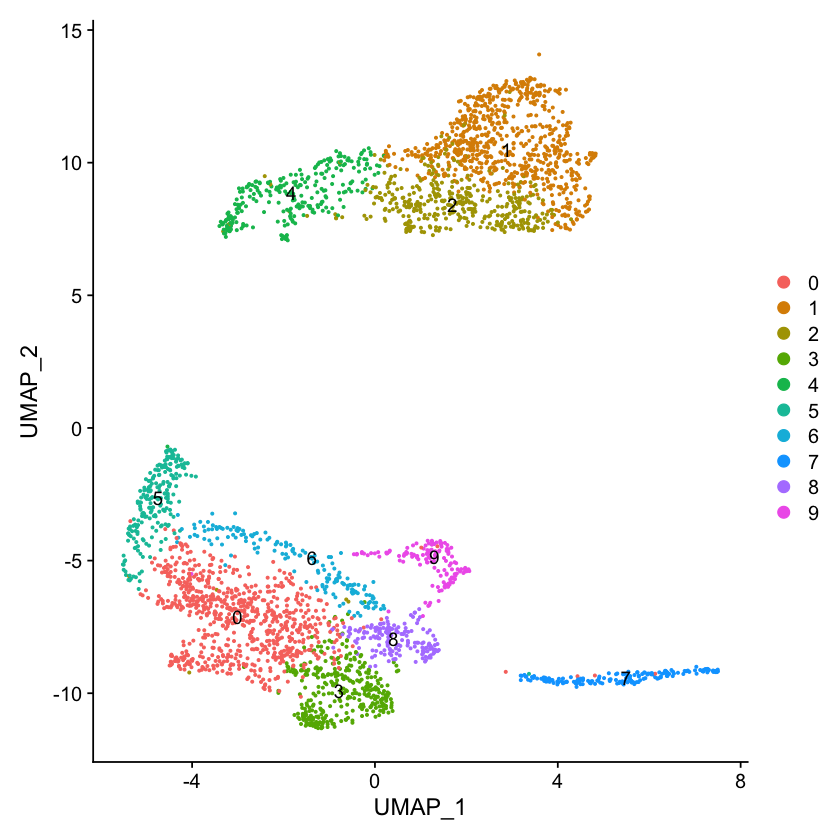

In [5]:
#Load the data
xenopus.combined <- readRDS(file = "xenopus_combined_and_clustered_no_out.rds")
xenopus.combined$exp <- xenopus.combined$stim

xenopus.combined$exp[xenopus.combined$exp == 'SIGAA2'] <- 'exp1'
xenopus.combined$exp[xenopus.combined$exp == 'SIGAB2'] <- 'exp1'
xenopus.combined$exp[xenopus.combined$exp == 'SIGAH5'] <- 'exp2'
xenopus.combined$exp[xenopus.combined$exp == 'SIGAH12'] <- 'exp2'

# From the full object assign cluster labels
xenopus.orig.exp1 <- subset(xenopus.combined,subset = exp == 'exp1')
xenopus.orig.exp2 <- subset(xenopus.combined,subset = exp == 'exp2')

print(xenopus.orig.exp1)
print(xenopus.orig.exp2)

xenopus.labels.exp1 <- xenopus.orig.exp1[['seurat_clusters']]
xenopus.labels.exp2 <- xenopus.orig.exp2[['seurat_clusters']]

clusters<- data.frame(table(Idents(xenopus.combined)))[['Var1']]

require(scales)

# Create vector with levels of object@ident
# identities <- levels(xenopus.combined[['seurat_clusters']])
# print(identities)
# Create vector of default ggplot2 colors
my_color_palette <- hue_pal()(length(clusters)+1)[1:10]
my_color_palette

DimPlot(xenopus.combined, reduction = "umap", label = TRUE,cols=my_color_palette)

In [6]:
xenopus.combined.exp1 <- subset(xenopus.combined.exp1, cells=colnames(xenopus.orig.exp1))
xenopus.combined.exp2 <- subset(xenopus.combined.exp2, cells=colnames(xenopus.orig.exp2))

all.equal(colnames(xenopus.orig.exp1), colnames(xenopus.combined.exp1))
all.equal(colnames(xenopus.orig.exp2), colnames(xenopus.combined.exp2))

xenopus.combined.exp1[['seurat_clusters']] <- xenopus.labels.exp1
xenopus.combined.exp2[['seurat_clusters']] <- xenopus.labels.exp2

[1] TRUE

[1] TRUE

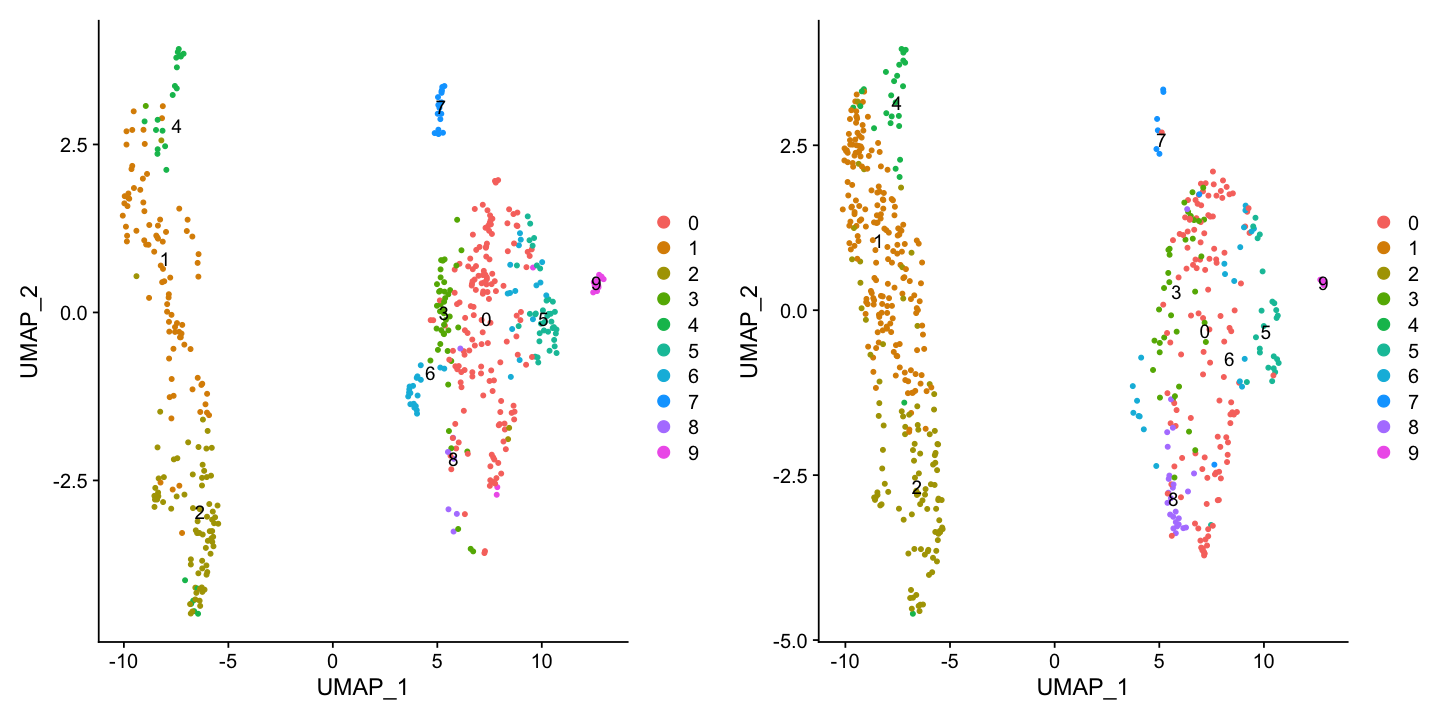

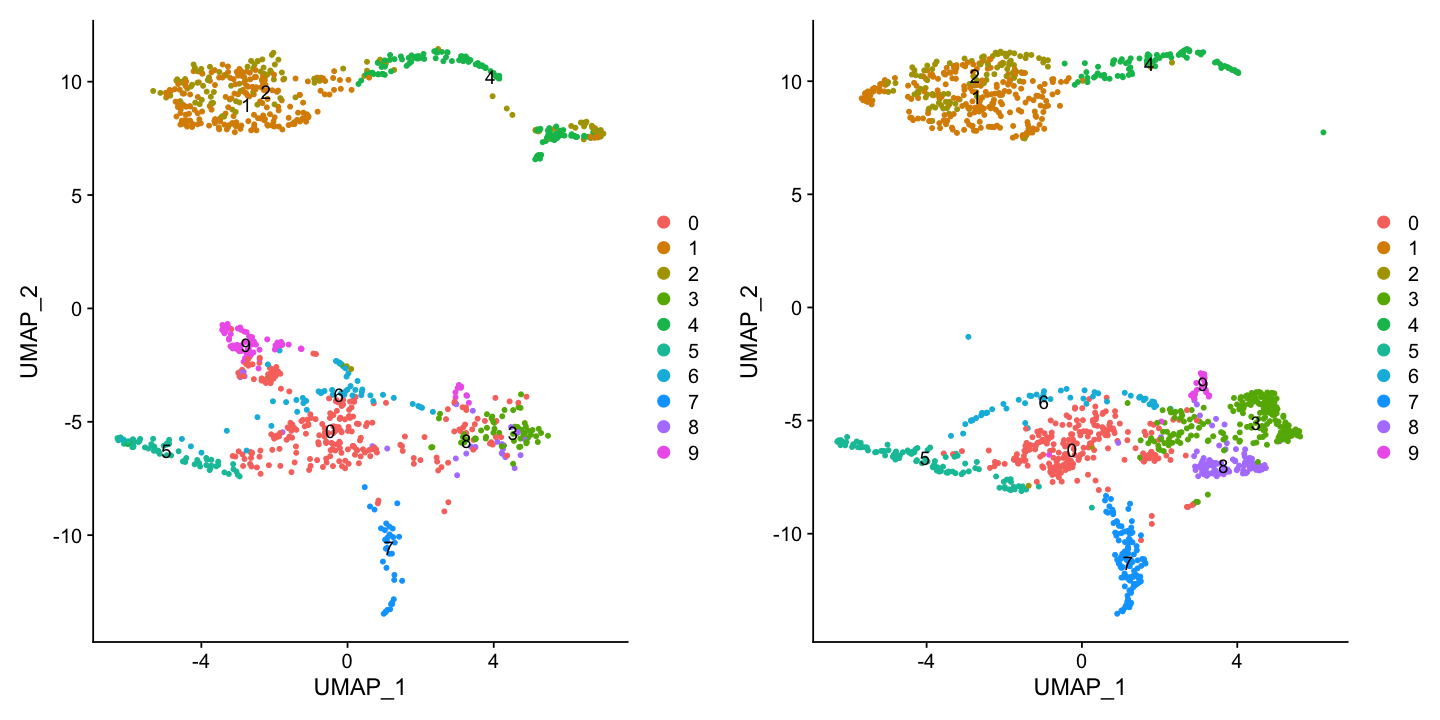

In [7]:
library(repr)
options(repr.plot.width=12, repr.plot.height=6)
#plot batches and clusters
p1 <- DimPlot(subset(xenopus.combined.exp1,subset= isnt =='NT'), group.by='seurat_clusters', reduction = "umap",
              cols=my_color_palette,label=TRUE)
p2 <- DimPlot(subset(xenopus.combined.exp1,subset= isnt =='IVF'),group.by='seurat_clusters', reduction = "umap",
              cols=my_color_palette,label = TRUE)
plt <- plot_grid(p1, p2,rel_widths = c(1, 1))
plt

p3 <- DimPlot(subset(xenopus.combined.exp2,subset= isnt =='NT'), group.by='seurat_clusters', reduction = "umap",
              cols=my_color_palette,label=TRUE)
p4 <- DimPlot(subset(xenopus.combined.exp2,subset= isnt =='IVF'),group.by='seurat_clusters', reduction = "umap",
              cols=my_color_palette,label = TRUE)
plt2 <- plot_grid(p3, p4,rel_widths = c(1, 1))
plt2

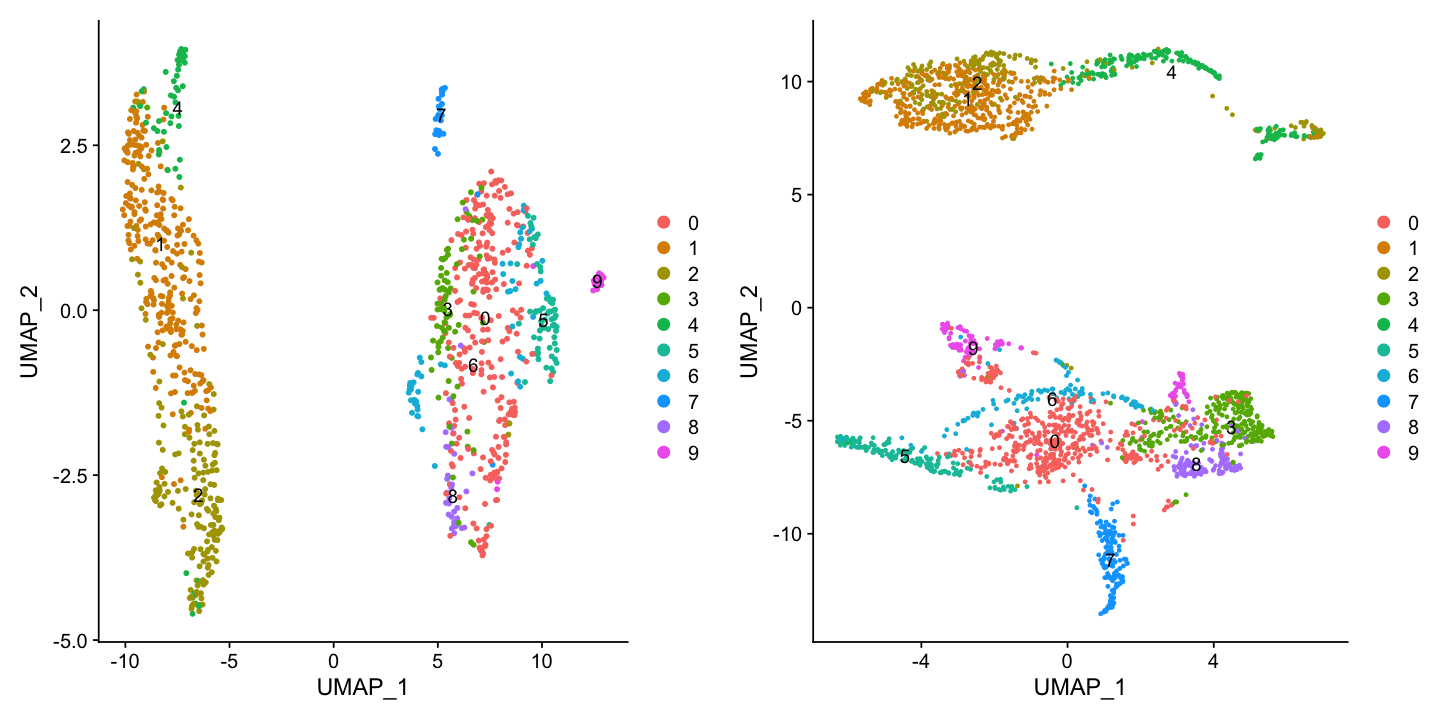

In [8]:
library(repr)
options(repr.plot.width=12, repr.plot.height=6)
#plot batches and clusters
p1 <- DimPlot(xenopus.combined.exp1, group.by='seurat_clusters', reduction = "umap",
              cols=my_color_palette,label=TRUE)
p2 <- DimPlot(xenopus.combined.exp2, group.by='seurat_clusters', reduction = "umap",
              cols=my_color_palette,label = TRUE)
plt <- plot_grid(p1, p2,rel_widths = c(1, 1))
plt

In [14]:
# Save the first two UMAP components and cluster labels for IVF and NT separately
umap.exp1 <- Embeddings(xenopus.combined.exp1, reduction = "umap")[, 1:2]
umap.exp2 <- Embeddings(xenopus.combined.exp2, reduction = "umap")[, 1:2]

cell.names.SIGAA2 <- colnames(subset(xenopus.combined,subset = stim == "SIGAA2"))
cell.names.SIGAB2 <- colnames(subset(xenopus.combined,subset = stim == "SIGAB2"))
cell.names.SIGAH5 <- colnames(subset(xenopus.combined,subset = stim == "SIGAH5"))
cell.names.SIGAH12 <- colnames(subset(xenopus.combined,subset = stim == "SIGAH12"))

#Save the lists to files. We will perform the RNA velocity analysis in a virtual environment with the
#latest version of scvelo
my_folder <- '/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/Data_analysis/RNA_VELOCITY/'

# Save the cluster labels
write.csv(xenopus.combined.exp1[['seurat_clusters']],file=paste(my_folder,'exp1_labels.csv',sep=""))
write.csv(xenopus.combined.exp2[['seurat_clusters']],file=paste(my_folder,'exp2_labels.csv',sep=""))

# Save the first 2 UMAP components
write.csv(umap.exp1,file=paste(my_folder,'exp1_umap.csv',sep=""))
write.csv(umap.exp2,file=paste(my_folder,'exp2_umap.csv',sep=""))

# Save the color palette of the clusters
write.table(my_color_palette[1:11],file=paste(my_folder,'cluster_colors.txt',sep=""),row.names=FALSE,
         col.names=FALSE, quote = FALSE)

# Save the cell names
write.table(cell.names.SIGAA2,file=paste(my_folder,'SIGAA2_cell_names.txt',sep=""),row.names=FALSE,
            col.names=FALSE, quote = FALSE)
write.table(cell.names.SIGAB2,file=paste(my_folder,'SIGAB2_cell_names.txt',sep=""),row.names=FALSE,
            col.names=FALSE, quote = FALSE)
write.table(cell.names.SIGAH5,file=paste(my_folder,'SIGAH5_cell_names.txt',sep=""),row.names=FALSE,
            col.names=FALSE, quote = FALSE)
write.table(cell.names.SIGAH12,file=paste(my_folder,'SIGAH12_cell_names.txt',sep=""),row.names=FALSE,
            col.names=FALSE, quote = FALSE)